In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [37]:
def load_data(path):
    if path in ('train', 'validation'):
        df = pd.read_csv('train.csv')
    train, valid = train_test_split(df, test_size=0.2)
    if path == 'train':
        x = train.drop(columns=['Credit_Score'])
        y = train['Credit_Score']
        return x, y
    elif path == 'validation':
        x = valid.drop(columns=['Credit_Score'])
        y = valid['Credit_Score']
        return x, y
    elif path == 'test':
        test = pd.read_csv('test.csv')
        return test

In [38]:
#provisional: dejar sólo datos numéricos
x, y = load_data('train')
x_valid, y_valid = load_data('validation')
x.drop(columns=['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], inplace=True)
x_valid.drop(columns=['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour'], inplace=True)
set(x.dtypes)

{dtype('int64'), dtype('float64')}

In [69]:
def fit_knn(x, y, **kwargs):
    return KNeighborsClassifier(**kwargs).fit(x, y)

              precision    recall  f1-score   support

        Good       0.87      0.84      0.85      3051
        Poor       0.89      0.84      0.87      4806
    Standard       0.85      0.89      0.87      8143

    accuracy                           0.87     16000
   macro avg       0.87      0.86      0.86     16000
weighted avg       0.87      0.87      0.87     16000



/home/gonzalo/.virtualenvs/nlp_1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


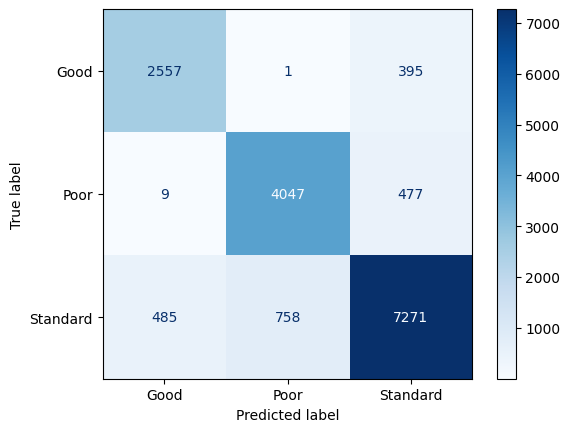

In [72]:
classifier_1 = fit_knn(x, y, n_neighbors=3)
y_pred = classifier_1.predict(x_valid)
eval_classifier(classifier_1, x_valid, y_valid, y_pred)

In [67]:
def eval_classifier(classifier, x_valid, y_valid, y_pred):
    print(classification_report(y_pred, y_valid))
    plot_confusion_matrix(classifier, x_valid, y_valid, display_labels=set(y_valid.values), cmap=plt.cm.Blues)

In [65]:
y_valid.values

array(['Standard', 'Good', 'Standard', ..., 'Standard', 'Standard',
       'Good'], dtype=object)